# 1.- Librerias



In [0]:
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
import re
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import graphviz


import time

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Ruta en google drive del proyecto

In [0]:
ruta = "/content/gdrive/My Drive/KeepCoding/ProyectoFinal/"

# 2.- Carga de datos train y test

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Cargo los datos para train

In [4]:
path_csv_train = ruta + 'data/listings_train.csv'
house_madrid_train = pd.read_csv(path_csv_train, sep =',', decimal='.') # cargamos fichero
print(f"El dataset contiene {len(house_madrid_train)} viviendas Airbnb con {len(house_madrid_train.columns)} características")
pd.set_option('display.max_columns', len(house_madrid_train)) # Para ver todas las columnas
house_madrid_train.head(5)  

El dataset contiene 9060 viviendas Airbnb con 219 características


,Unnamed: 0,Price,id,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,sentiment,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte,Dias_activo,Internet,Free street parking,Oven,Crib,Cooking basics,Luggage dropoff allowed,Smoke detector,Room-darkening shades,Dishwasher,Paid parking on premises,Wide entrance,No stairs or steps to enter,Cable TV,Paid parking off premises,Elevator,Buzzer/wireless intercom,Extra pillows and blankets,Bed linens,Host greets you,Family/kid friendly,Fire extinguisher,Hangers,Patio or balcony,Microwave,Pets allowed,Smoking allowed,TV,Washer,Shampoo,Hair dryer,Dryer,Long term stays allowed,Breakfast,Coffee maker,First aid kit,Iron,Private entrance,Laptop friendly workspace,Lock on bedroom door,Hot water,Air conditioning,Stove,Refrigerator,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,neighbourhood_cleansed_Acacias,neighbourhood_cleansed_Argüelles,neighbourhood_cleansed_Cortes,neighbourhood_cleansed_Cuatro Caminos,neighbourhood_cleansed_Delicias,neighbourhood_cleansed_Embajadores,neighbourhood_cleansed_Goya,neighbourhood_cleansed_Guindalera,neighbourhood_cleansed_Ibiza,neighbourhood_cleansed_Justicia,neighbourhood_cleansed_Numancia,neighbourhood_cleansed_Otro_Barrio,neighbourhood_cleansed_Pacífico,neighbourhood_cleansed_Palacio,neighbourhood_cleansed_Palos de Moguer,neighbourhood_cleansed_Puerta del Angel,neighbourhood_cleansed_Recoletos,neighbourhood_cleansed_San Diego,neighbourhood_cleansed_Sol,neighbourhood_cleansed_Trafalgar,neighbourhood_cleansed_Universidad,property_type_Apartment,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,review_scores_rating_0-49/100,review_scores_rating_50-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-4/10,review_scores_accuracy_10/10,review_scores_accuracy_5-7/10,review_scores_accuracy_8/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-4/10,review_scores_cleanliness_10/10,review_scores_cleanliness_5-7/10,review_scores_cleanliness_8/10,review_scores_cleanliness_9/10,review_scores_checkin_0-4/10,review_scores_checkin_10/10,review_scores_checkin_5-7/10,review_scores_checkin_8/10,review_scores_checkin_9/10,review_scores_communication_0-4/10,review_scores_communication_10/10,review_scores_communication_5-7/10,review_scores_communication_8/10,review_scores_communication_9/10,review_scores_location_0-4/10,review_scores_location_10/10,review_scores_location_5-7/10,review_scores_location_8/10,review_scores_location_9/10,review_scores_value_0-4/10,review_scores_value_10/10,review_scores_value_5-7/10,review_scores_value_8/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,dist_to_station_+5km,dist_to_station_0-200m,dist_to_station_1km-3km,dist_to_station_200m-500m,dist_to_station_3km-5km,dist_to_station_500m-1km,dist_to_parking_+5km,dist_to_parking_0-200m,dist_to_parking_1km-3km,dist_to_parking_200m-500m,dist_to_parking_3km-5km,dist_to_parking_500m-1km,dist_to_museo1_+5km,dist_to_museo1_0-200m,dist_to_museo1_1km-3km,dist_to_museo1_200m-500m,dist_to_museo1_3km-5km,dist_to_museo1_500m-1km,dist_to_museo2_+5km,dist_to_museo2_0-200m,dist_to_museo2_1km-3km,dist_to_museo2_200m-500m,dist_to_museo2_3km-5km,dist_to_museo2_500m-1km,dist_to_museo3_+5km,dist_to_museo3_0-200m,dist_to_museo3_1km-3km,dist_to_museo3_200m-500m,dist_to_museo3_3km-5km,dist_to_museo3_500m-1km,dist_to_museo4_+5km,dist_to_museo4_0-200m,dist_to_museo4_1km-3km,dist_to_museo4_200m-500m,dist_to_museo4_3km-5km,dist_to_museo4_500m-1km,dist_to_museo5_

Cargo los datos para test

In [5]:
path_csv_test = ruta + 'data/listings_test.csv'
house_madrid_test = pd.read_csv(path_csv_test, sep =',', decimal='.') # cargamos fichero
print(f"El dataset contiene {len(house_madrid_test)} viviendas Airbnb con {len(house_madrid_test.columns)} características")
pd.set_option('display.max_columns', len(house_madrid_test)) # Para ver todas las columnas
house_madrid_test.head(5) 

El dataset contiene 3872 viviendas Airbnb con 219 características


,Unnamed: 0,Price,id,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,sentiment,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte,Dias_activo,Internet,Free street parking,Oven,Crib,Cooking basics,Luggage dropoff allowed,Smoke detector,Room-darkening shades,Dishwasher,Paid parking on premises,Wide entrance,No stairs or steps to enter,Cable TV,Paid parking off premises,Elevator,Buzzer/wireless intercom,Extra pillows and blankets,Bed linens,Host greets you,Family/kid friendly,Fire extinguisher,Hangers,Patio or balcony,Microwave,Pets allowed,Smoking allowed,TV,Washer,Shampoo,Hair dryer,Dryer,Long term stays allowed,Breakfast,Coffee maker,First aid kit,Iron,Private entrance,Laptop friendly workspace,Lock on bedroom door,Hot water,Air conditioning,Stove,Refrigerator,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,neighbourhood_cleansed_Acacias,neighbourhood_cleansed_Argüelles,neighbourhood_cleansed_Cortes,neighbourhood_cleansed_Cuatro Caminos,neighbourhood_cleansed_Delicias,neighbourhood_cleansed_Embajadores,neighbourhood_cleansed_Goya,neighbourhood_cleansed_Guindalera,neighbourhood_cleansed_Ibiza,neighbourhood_cleansed_Justicia,neighbourhood_cleansed_Numancia,neighbourhood_cleansed_Otro_Barrio,neighbourhood_cleansed_Pacífico,neighbourhood_cleansed_Palacio,neighbourhood_cleansed_Palos de Moguer,neighbourhood_cleansed_Puerta del Angel,neighbourhood_cleansed_Recoletos,neighbourhood_cleansed_San Diego,neighbourhood_cleansed_Sol,neighbourhood_cleansed_Trafalgar,neighbourhood_cleansed_Universidad,property_type_Apartment,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,review_scores_rating_0-49/100,review_scores_rating_50-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-4/10,review_scores_accuracy_10/10,review_scores_accuracy_5-7/10,review_scores_accuracy_8/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-4/10,review_scores_cleanliness_10/10,review_scores_cleanliness_5-7/10,review_scores_cleanliness_8/10,review_scores_cleanliness_9/10,review_scores_checkin_0-4/10,review_scores_checkin_10/10,review_scores_checkin_5-7/10,review_scores_checkin_8/10,review_scores_checkin_9/10,review_scores_communication_0-4/10,review_scores_communication_10/10,review_scores_communication_5-7/10,review_scores_communication_8/10,review_scores_communication_9/10,review_scores_location_0-4/10,review_scores_location_10/10,review_scores_location_5-7/10,review_scores_location_8/10,review_scores_location_9/10,review_scores_value_0-4/10,review_scores_value_10/10,review_scores_value_5-7/10,review_scores_value_8/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,dist_to_station_+5km,dist_to_station_0-200m,dist_to_station_1km-3km,dist_to_station_200m-500m,dist_to_station_3km-5km,dist_to_station_500m-1km,dist_to_parking_+5km,dist_to_parking_0-200m,dist_to_parking_1km-3km,dist_to_parking_200m-500m,dist_to_parking_3km-5km,dist_to_parking_500m-1km,dist_to_museo1_+5km,dist_to_museo1_0-200m,dist_to_museo1_1km-3km,dist_to_museo1_200m-500m,dist_to_museo1_3km-5km,dist_to_museo1_500m-1km,dist_to_museo2_+5km,dist_to_museo2_0-200m,dist_to_museo2_1km-3km,dist_to_museo2_200m-500m,dist_to_museo2_3km-5km,dist_to_museo2_500m-1km,dist_to_museo3_+5km,dist_to_museo3_0-200m,dist_to_museo3_1km-3km,dist_to_museo3_200m-500m,dist_to_museo3_3km-5km,dist_to_museo3_500m-1km,dist_to_museo4_+5km,dist_to_museo4_0-200m,dist_to_museo4_1km-3km,dist_to_museo4_200m-500m,dist_to_museo4_3km-5km,dist_to_museo4_500m-1km,dist_to_museo5_

Elimino las columnas Unname

In [0]:
house_madrid_train.drop(house_madrid_train.columns[house_madrid_train.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
house_madrid_test.drop(house_madrid_test.columns[house_madrid_test.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

Elimino las columnas "id"

In [0]:
house_madrid_train.drop ('id', axis=1, inplace=True)
house_madrid_test.drop ('id', axis=1, inplace=True)

#3.- Separación X e Y. Normalización

Train

In [0]:
# Separamos X and y
X_train = house_madrid_train.drop('Price', axis=1)
y_train = house_madrid_train.Price

# Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))

Test

In [0]:
# Separamos X and y
X_test = house_madrid_test.drop('Price', axis=1)
y_test = house_madrid_test.Price

# Scaling
scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=list(X_test.columns)) 

## 4.- Modelado

Voy a aplicar diferentes modelos "Supervised Machine Learning" y los compararemos entre si. La métrica que usaré al ser un problema de regresión es el RMSE (Error cuadrático medio)

Al haber dividido en train y test antes de cualquier procesado y haber realizado la conversión de variables categóricas con el metodo dumy podría ocurrir que tenga diferente número de características en un cojunto y en otro. Voya asegurarme que tengo en los dos lo mismo y que las características están ordenadas de la misma manera:

In [0]:
missing_cols = set (X_train.columns) - set (X_test.columns)
#Caso de que que en test no tenga las mismas columnas las añado con valor 0
for c in missing_cols:
    X_test [c]=0
#Me aseguro que el orden de las columnas en test sea el mismo que en train
X_test = X_test[X_train.columns]

In [11]:
X_train.head(1)

,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,sentiment,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte,Dias_activo,Internet,Free street parking,Oven,Crib,Cooking basics,Luggage dropoff allowed,Smoke detector,Room-darkening shades,Dishwasher,Paid parking on premises,Wide entrance,No stairs or steps to enter,Cable TV,Paid parking off premises,Elevator,Buzzer/wireless intercom,Extra pillows and blankets,Bed linens,Host greets you,Family/kid friendly,Fire extinguisher,Hangers,Patio or balcony,Microwave,Pets allowed,Smoking allowed,TV,Washer,Shampoo,Hair dryer,Dryer,Long term stays allowed,Breakfast,Coffee maker,First aid kit,Iron,Private entrance,Laptop friendly workspace,Lock on bedroom door,Hot water,Air conditioning,Stove,Refrigerator,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,neighbourhood_cleansed_Acacias,neighbourhood_cleansed_Argüelles,neighbourhood_cleansed_Cortes,neighbourhood_cleansed_Cuatro Caminos,neighbourhood_cleansed_Delicias,neighbourhood_cleansed_Embajadores,neighbourhood_cleansed_Goya,neighbourhood_cleansed_Guindalera,neighbourhood_cleansed_Ibiza,neighbourhood_cleansed_Justicia,neighbourhood_cleansed_Numancia,neighbourhood_cleansed_Otro_Barrio,neighbourhood_cleansed_Pacífico,neighbourhood_cleansed_Palacio,neighbourhood_cleansed_Palos de Moguer,neighbourhood_cleansed_Puerta del Angel,neighbourhood_cleansed_Recoletos,neighbourhood_cleansed_San Diego,neighbourhood_cleansed_Sol,neighbourhood_cleansed_Trafalgar,neighbourhood_cleansed_Universidad,property_type_Apartment,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,review_scores_rating_0-49/100,review_scores_rating_50-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-4/10,review_scores_accuracy_10/10,review_scores_accuracy_5-7/10,review_scores_accuracy_8/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-4/10,review_scores_cleanliness_10/10,review_scores_cleanliness_5-7/10,review_scores_cleanliness_8/10,review_scores_cleanliness_9/10,review_scores_checkin_0-4/10,review_scores_checkin_10/10,review_scores_checkin_5-7/10,review_scores_checkin_8/10,review_scores_checkin_9/10,review_scores_communication_0-4/10,review_scores_communication_10/10,review_scores_communication_5-7/10,review_scores_communication_8/10,review_scores_communication_9/10,review_scores_location_0-4/10,review_scores_location_10/10,review_scores_location_5-7/10,review_scores_location_8/10,review_scores_location_9/10,review_scores_value_0-4/10,review_scores_value_10/10,review_scores_value_5-7/10,review_scores_value_8/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,dist_to_station_+5km,dist_to_station_0-200m,dist_to_station_1km-3km,dist_to_station_200m-500m,dist_to_station_3km-5km,dist_to_station_500m-1km,dist_to_parking_+5km,dist_to_parking_0-200m,dist_to_parking_1km-3km,dist_to_parking_200m-500m,dist_to_parking_3km-5km,dist_to_parking_500m-1km,dist_to_museo1_+5km,dist_to_museo1_0-200m,dist_to_museo1_1km-3km,dist_to_museo1_200m-500m,dist_to_museo1_3km-5km,dist_to_museo1_500m-1km,dist_to_museo2_+5km,dist_to_museo2_0-200m,dist_to_museo2_1km-3km,dist_to_museo2_200m-500m,dist_to_museo2_3km-5km,dist_to_museo2_500m-1km,dist_to_museo3_+5km,dist_to_museo3_0-200m,dist_to_museo3_1km-3km,dist_to_museo3_200m-500m,dist_to_museo3_3km-5km,dist_to_museo3_500m-1km,dist_to_museo4_+5km,dist_to_museo4_0-200m,dist_to_museo4_1km-3km,dist_to_museo4_200m-500m,dist_to_museo4_3km-5km,dist_to_museo4_500m-1km,dist_to_museo5_+5km,dist_to_museo5_

In [12]:
X_test.head(1)

,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,sentiment,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte,Dias_activo,Internet,Free street parking,Oven,Crib,Cooking basics,Luggage dropoff allowed,Smoke detector,Room-darkening shades,Dishwasher,Paid parking on premises,Wide entrance,No stairs or steps to enter,Cable TV,Paid parking off premises,Elevator,Buzzer/wireless intercom,Extra pillows and blankets,Bed linens,Host greets you,Family/kid friendly,Fire extinguisher,Hangers,Patio or balcony,Microwave,Pets allowed,Smoking allowed,TV,Washer,Shampoo,Hair dryer,Dryer,Long term stays allowed,Breakfast,Coffee maker,First aid kit,Iron,Private entrance,Laptop friendly workspace,Lock on bedroom door,Hot water,Air conditioning,Stove,Refrigerator,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,neighbourhood_cleansed_Acacias,neighbourhood_cleansed_Argüelles,neighbourhood_cleansed_Cortes,neighbourhood_cleansed_Cuatro Caminos,neighbourhood_cleansed_Delicias,neighbourhood_cleansed_Embajadores,neighbourhood_cleansed_Goya,neighbourhood_cleansed_Guindalera,neighbourhood_cleansed_Ibiza,neighbourhood_cleansed_Justicia,neighbourhood_cleansed_Numancia,neighbourhood_cleansed_Otro_Barrio,neighbourhood_cleansed_Pacífico,neighbourhood_cleansed_Palacio,neighbourhood_cleansed_Palos de Moguer,neighbourhood_cleansed_Puerta del Angel,neighbourhood_cleansed_Recoletos,neighbourhood_cleansed_San Diego,neighbourhood_cleansed_Sol,neighbourhood_cleansed_Trafalgar,neighbourhood_cleansed_Universidad,property_type_Apartment,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,review_scores_rating_0-49/100,review_scores_rating_50-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-4/10,review_scores_accuracy_10/10,review_scores_accuracy_5-7/10,review_scores_accuracy_8/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-4/10,review_scores_cleanliness_10/10,review_scores_cleanliness_5-7/10,review_scores_cleanliness_8/10,review_scores_cleanliness_9/10,review_scores_checkin_0-4/10,review_scores_checkin_10/10,review_scores_checkin_5-7/10,review_scores_checkin_8/10,review_scores_checkin_9/10,review_scores_communication_0-4/10,review_scores_communication_10/10,review_scores_communication_5-7/10,review_scores_communication_8/10,review_scores_communication_9/10,review_scores_location_0-4/10,review_scores_location_10/10,review_scores_location_5-7/10,review_scores_location_8/10,review_scores_location_9/10,review_scores_value_0-4/10,review_scores_value_10/10,review_scores_value_5-7/10,review_scores_value_8/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,dist_to_station_+5km,dist_to_station_0-200m,dist_to_station_1km-3km,dist_to_station_200m-500m,dist_to_station_3km-5km,dist_to_station_500m-1km,dist_to_parking_+5km,dist_to_parking_0-200m,dist_to_parking_1km-3km,dist_to_parking_200m-500m,dist_to_parking_3km-5km,dist_to_parking_500m-1km,dist_to_museo1_+5km,dist_to_museo1_0-200m,dist_to_museo1_1km-3km,dist_to_museo1_200m-500m,dist_to_museo1_3km-5km,dist_to_museo1_500m-1km,dist_to_museo2_+5km,dist_to_museo2_0-200m,dist_to_museo2_1km-3km,dist_to_museo2_200m-500m,dist_to_museo2_3km-5km,dist_to_museo2_500m-1km,dist_to_museo3_+5km,dist_to_museo3_0-200m,dist_to_museo3_1km-3km,dist_to_museo3_200m-500m,dist_to_museo3_3km-5km,dist_to_museo3_500m-1km,dist_to_museo4_+5km,dist_to_museo4_0-200m,dist_to_museo4_1km-3km,dist_to_museo4_200m-500m,dist_to_museo4_3km-5km,dist_to_museo4_500m-1km,dist_to_museo5_+5km,dist_to_museo5_

## 4.1.- Modelo Regresión Lineal 

Aplico un modelo de regresión simple:

In [14]:
hpm_reg_start = time.time()

# Modelo de regresión lineal de Scikit-Learn
hpm_reg = LinearRegression() 

# Entreno el modelo con los datos de train:
hpm_reg.fit(X_train, y_train) 

# Tras el entrenamiento hacemos la predicción usando las muestras de test 
training_preds_hpm_reg = hpm_reg.predict(X_train)
val_preds_hpm_reg = hpm_reg.predict(X_test)

hpm_reg_end = time.time()

print(f"Time taken to run: {round((hpm_reg_end - hpm_reg_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Test RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Test r2:", round(r2_score(y_test, val_preds_hpm_reg),4))

Time taken to run: 0.0 minutes

Training RMSE: 0.1034
Test RMSE: 5.710513120345443e+20

Training r2: 0.708
Test r2: -1.6159898424813717e+21


Vemos que en train si tenemos un resultado aceptable pero el error en Test es muy alto con lo que este modelo simple de regresión lineal no nos sirve. 

## 4.2.- Regularización: Ridge Regression

Consiste en penalizar los coeficientes de alto valor añadiendo un parámetro alfa. Voy a probar la regularización con alpha = 0.01, 0.1, 1, 10, 100

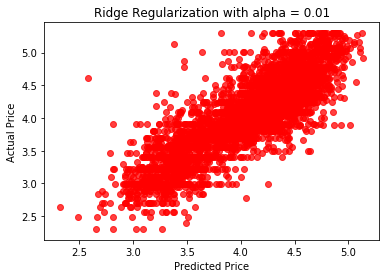

R^2 is: 0.7106
RMSE is: 0.1023


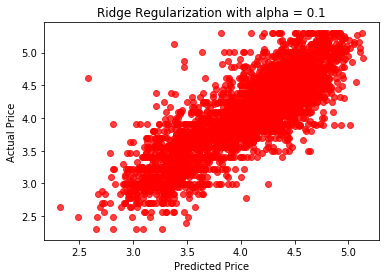

R^2 is: 0.7106
RMSE is: 0.1023


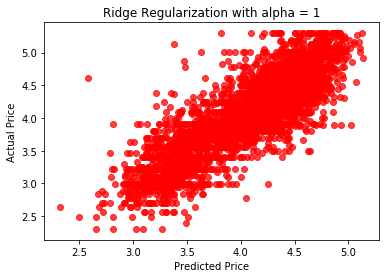

R^2 is: 0.7108
RMSE is: 0.1022


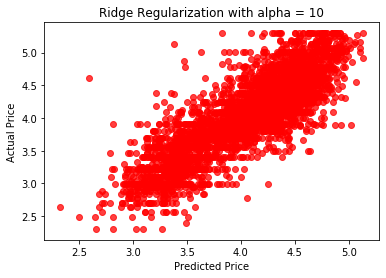

R^2 is: 0.711
RMSE is: 0.1021


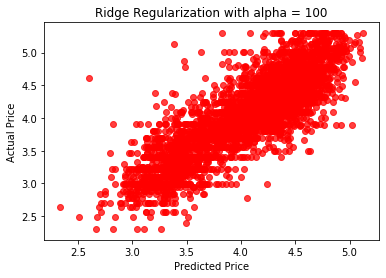

R^2 is: 0.7115
RMSE is: 0.102


In [13]:
actual_values = y_test

for i in range (-2, 3):
    alpha = 10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                   
                   round(ridge_model.score(X_test, y_test), 4),
                   round(mean_squared_error(y_test, preds_ridge),4))
                    
    plt.show()
    print (overlay)
    

Se puede ver que el error en test ha mejorado. Para encontrar el mejor valor de alfa recurrimos a la validación cruzada

Valores de alpha: [1.00000000e-15 4.52035366e-15 2.04335972e-14 9.23670857e-14
 4.17531894e-13 1.88739182e-12 8.53167852e-12 3.85662042e-11
 1.74332882e-10 7.88046282e-10 3.56224789e-09 1.61026203e-08
 7.27895384e-08 3.29034456e-07 1.48735211e-06 6.72335754e-06
 3.03919538e-05 1.37382380e-04 6.21016942e-04 2.80721620e-03
 1.26896100e-02 5.73615251e-02 2.59294380e-01 1.17210230e+00
 5.29831691e+00 2.39502662e+01 1.08263673e+02 4.89390092e+02
 2.21221629e+03 1.00000000e+04]
best mean cross-validation score: -0.109
best parameters: {'alpha': 108.26367338740563}


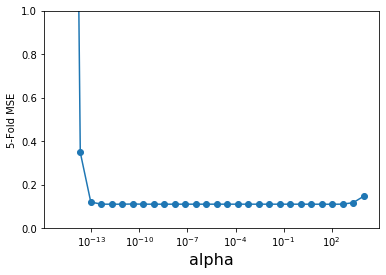

In [14]:
alpha_vector = np.logspace(-15,4,30)
param_grid = {'alpha': alpha_vector }
print (f'Valores de alpha: {alpha_vector}')
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show()

In [15]:
alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(X_train,y_train)

ytrainRidge = ridge.predict(X_train)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print ('R^2 train =', round (ridge.score(X_train, y_train), 4))

# predicción
y_hat = ridge.predict(X_test)
w = ridge.coef_
norm_w2 = np.dot(w,w.T)

# error
error_test = np.mean(np.power(y_test - y_hat,2)) 

print ('alpha_optimo =', alpha_optimo )
print ('RMSE test =', np.sqrt(error_test) )
print ('R^2 test =', round (ridge.score(X_test, y_test), 4))
print ('Coeficientes:')
print (w)

RMSE Modelo Ridge (train): 0.322
R^2 train = 0.7077
alpha_optimo = 108.26367338740563
RMSE test = 0.3192936968737023
R^2 test = 0.7115
Coeficientes:
[ 9.75805933e-04 -2.32257531e-03  7.37424926e-04  3.69587985e-03
  2.22951501e-01  2.17014699e-02  1.49830750e-02 -1.55075778e-02
 -5.79308938e-02 -2.75598117e-03 -1.56155192e-02  8.74960023e-02
 -1.01763121e-01 -5.75866131e-04  8.99634291e-03 -1.18982784e-02
 -8.70853778e-03 -1.89951526e-02 -5.85407790e-03 -1.12907930e-02
  1.46645995e-02 -1.43021950e-02 -1.11382247e-02  5.83062119e-03
  3.01837333e-03 -2.47495287e-02  1.23527855e-02  6.92987470e-03
 -7.40623165e-03  3.61271106e-02  7.18879877e-03  1.04948621e-03
 -2.01285233e-03 -3.39482154e-03 -3.39776796e-03  2.65878592e-02
  4.98279513e-03 -6.79652301e-03 -4.55647813e-03  4.84447879e-03
  7.32723894e-03 -4.78582247e-03  8.10900848e-03  1.53241049e-02
 -8.09277847e-03 -1.06436904e-02 -4.23194950e-03  1.01233644e-02
 -4.66544274e-04  1.62860276e-02  1.51890304e-02  2.43257002e-02
  2.44

Resultado Ridge: 
- R2 train = 0.7077
- R2 test = 0.7115
- RMSE test = 0.3192936968737023

## 4.3.- Selección de características: Lasso

Con la selección de características buscamos reducir la dimensionalidad del problema

best mean cross-validation score: -0.109
best parameters: {'alpha': 0.0006951927961775605}


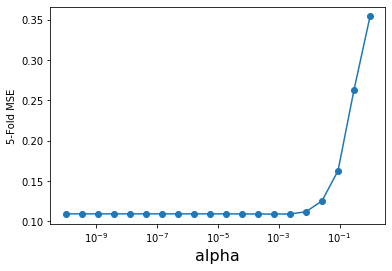

In [0]:
import warnings
warnings.filterwarnings('ignore')

#Ya tengo los datos escalados tanto de train como de test

alpha_vector = np.logspace(-10,0,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [0]:
feature_names = X_train.columns[0:]

#Ya lo tengo escalado

alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)


ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print ('R^2 train =', round (lasso.score(X_train, y_train), 4))
print ('R^2 test =', round (lasso.score(X_test, y_test), 4))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

RMSE Modelo Lasso (train): 0.329
RMSE Modelo Lasso (test) : 0.323
R^2 train = 0.6937
R^2 test = 0.7056
host_is_superhost 0.0
host_listings_count -0.0
host_identity_verified 0.0
is_location_exact 0.0
accommodates 0.21722697030649218
bathrooms 0.016842064923639242
security_deposit 0.012557124730317958
cleaning_fee -0.001163326917694412
extra_people -0.04863666531093221
minimum_nights 0.0
maximum_nights -0.008231300032237161
availability_90 0.07753413885068076
number_of_reviews -0.07504274626008064
instant_bookable -0.0
sentiment 0.003624728707666285
Topic_general -0.0
Topic_descripcion 0.0
Topic_atracciones -0.0
Topic_servicios 0.0
Topic_transporte -0.002928453862801623
Dias_activo 0.014237993827287293
Internet -0.0
Free street parking -0.014490257547741603
Oven 0.0
Crib 0.0
Cooking basics -0.013929381361903853
Luggage dropoff allowed 0.007107294039261051
Smoke detector 0.0
Room-darkening shades -0.0
Dishwasher 0.031080385315126344
Paid parking on premises 0.006482137101672207
Wide entra

- RMSE Modelo Lasso (train): 0.329
- RMSE Modelo Lasso (test) : 0.323
- R^2 train = 0.6937
- R^2 test = 0.7056

Se puede apreciar que el error es un poco más alto que el conseguido con Ridge (RMSE=0.31929) pero con este modelo
se ve que hay algunas características que se pueden eliminar (coeficientes a 0) con lo que se reduce la complejidad del modelo a cambio de tener un error algo más alto (RMSE = 0.323)

In [0]:
#Características que se pueden eliminar del modelo al salir con coeficiente 0
i=0
for f,wi in zip(feature_names,w):
    if (wi==0):
        print(f)
        i=i+1


print ('Numero de features originales: ' + str(len(feature_names)))
print ('Numero de features eliminadas: ' + str(i) )   
print ('Me quedo con: ' + str(len(feature_names)-i) + ' features')     
             

       

host_is_superhost
host_listings_count
host_identity_verified
is_location_exact
minimum_nights
instant_bookable
Topic_general
Topic_descripcion
Topic_atracciones
Topic_servicios
Internet
Oven
Crib
Smoke detector
Room-darkening shades
Wide entrance
No stairs or steps to enter
Cable TV
Paid parking off premises
Buzzer/wireless intercom
Bed linens
Host greets you
Fire extinguisher
Smoking allowed
Washer
Long term stays allowed
Coffee maker
First aid kit
Iron
Laptop friendly workspace
Hot water
Stove
Refrigerator
host_response_time_a few days or more
host_response_time_unknown
host_response_time_within a day
host_response_time_within a few hours
host_response_time_within an hour
host_response_rate_50-89%
neighbourhood_cleansed_Acacias
neighbourhood_cleansed_Argüelles
neighbourhood_cleansed_Cortes
neighbourhood_cleansed_Cuatro Caminos
neighbourhood_cleansed_Delicias
neighbourhood_cleansed_Goya
neighbourhood_cleansed_Guindalera
neighbourhood_cleansed_Ibiza
neighbourhood_cleansed_Justicia
neig

Viendo todas las características que se puede eliminar (135) y el pequeño incremento de error de RMSE=0.31929 a RMSE = 0.323 me quedo con este modelo de Lasso de momento

## 4.4.- Árbol de Regresión

Utilizo GridSearch para determinar el mejor parámetro de profundidad.

best mean cross-validation score: 0.637
best parameters: {'max_depth': 6}


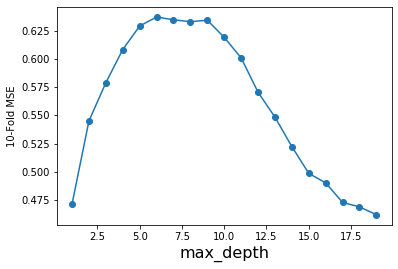

In [0]:
maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [0]:
#El valor ótimo es 6, viendo la gráfica no hay mucha diferencia si
#pruebo con 5 y es menos complejo
#maxDepthOptimo = grid.best_params_['max_depth']
maxDepthOptimo = 5
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)


ytrainarbol = treeModel.predict(X_train)
ytestarbol = treeModel.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 train =', round (treeModel.score(X_train, y_train), 4))
print ('R^2 test =', round (treeModel.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.355
RMSE Modelo  (test) : 0.358
R^2 train = 0.644
R^2 test = 0.6365


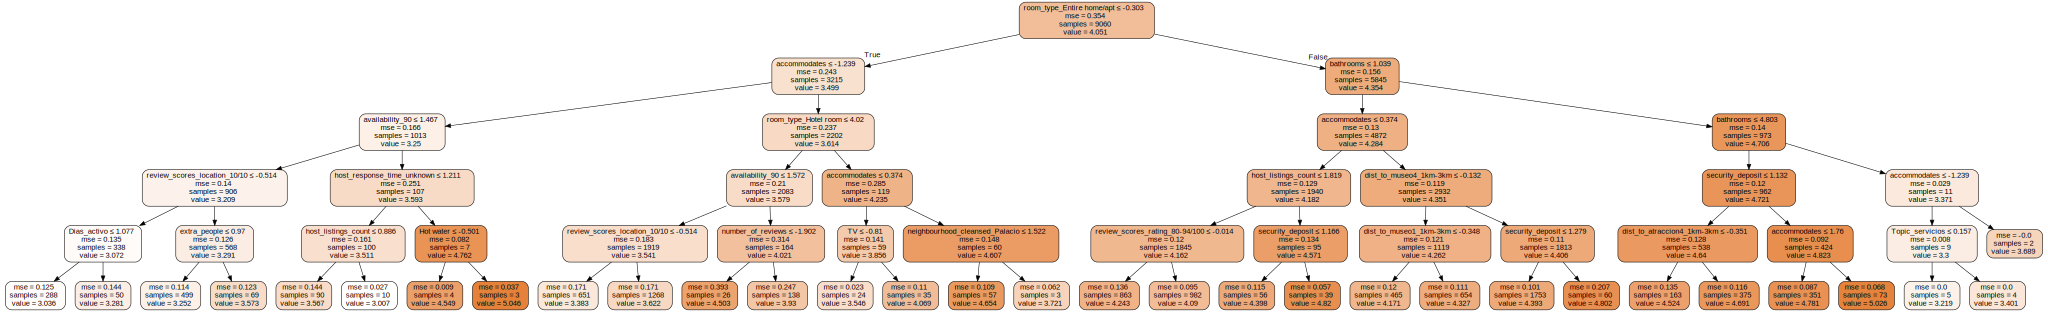

In [0]:
dot_data = tree.export_graphviz(treeModel, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

No se consiguen mejores prestaciones que con Lasso.

- RMSE Modelo  (train): 0.355
- RMSE Modelo  (test) : 0.358
- R^2 train = 0.644
- R^2 test = 0.6365

## 4.5.- Random forest

best mean cross-validation score: 0.689
best parameters: {'max_depth': 14}


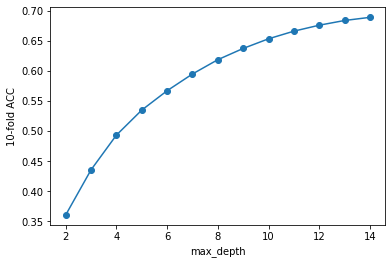

In [0]:
maxDepth = range(2,15)

tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=600, max_features='sqrt'), param_grid=tuned_parameters,cv=10)
#grid = GridSearchCV(RandomForestRegressor(random_state=0, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [0]:
#El valor óptimo es 14 y la tendencia parece que va hacia arriba. 
#Voy a poner 8 que es menos complejo y no hay mucha diferencia de puntuación

#maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=8,n_estimators=600,max_features='sqrt').fit(X_train,y_train)

ytrainarbol = bagModel.predict(X_train)
ytestarbol = bagModel.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 train =', round (bagModel.score(X_train, y_train), 4))
print ('R^2 test =', round (bagModel.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.339
RMSE Modelo  (test) : 0.356
R^2 train = 0.6754
R^2 test = 0.641


Me está dando este modelo prestaciones parecedias a las de un árbol simple pero es algo mejor

- RMSE Modelo  (train): 0.339
- RMSE Modelo  (test) : 0.356
- R^2 train = 0.6754
- R^2 test = 0.641

Veo ahora cuales son las características más importantes:

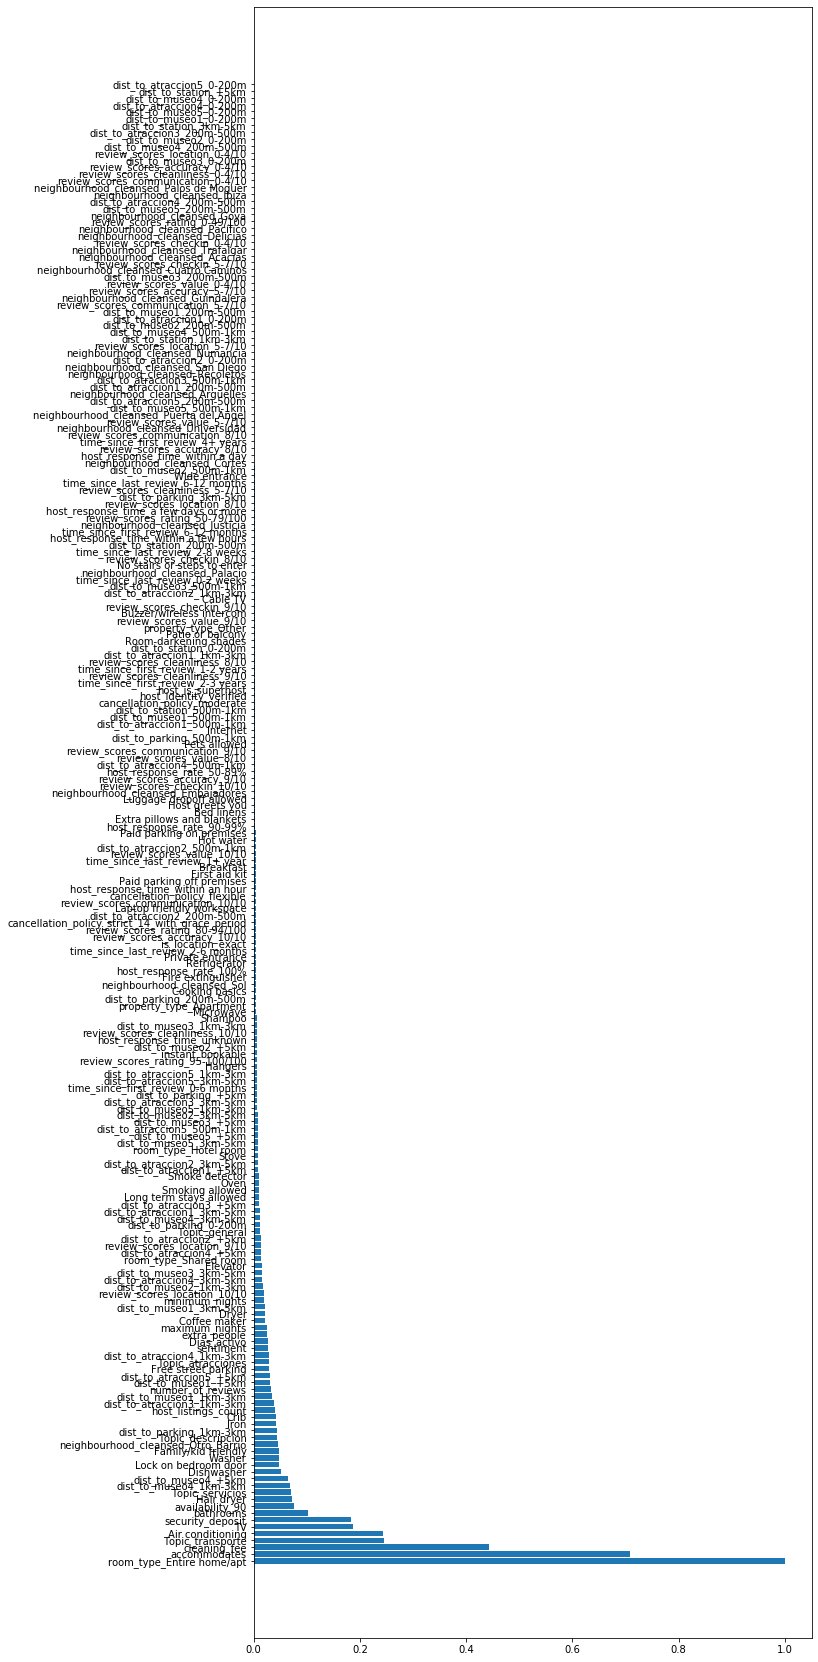

In [0]:
feature_names = X_train.columns[0:]
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,30))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [0]:
feature_names[indices[0:10]]

Index(['room_type_Entire home/apt', 'accommodates', 'cleaning_fee',
       'Topic_transporte', 'Air conditioning', 'TV', 'security_deposit',
       'bathrooms', 'availability_90', 'Hair dryer'],
      dtype='object')

La importancia proporciona una puntuación que indica como de útil o valiosa es cada característica en la construcción de los árboles de decisión dentro del modelo. Cuanto más se usa un atributo para tomar decisiones clave con árboles de decisión, mayor es su importancia relativa.

Como se puede ver en la gráfica un buen número de caracterísitcas tienen una importancia de 0 por lo que se podrían eliminar en el modelo. La característica más importante es que la vivienda sea de tipo "Entire home/apt" lo cual tiene sentido. El precio será mayor si se ofrece para alquilé la casa completa. Por tanto a nivel prático es mucho mejor ofertar el piso/casa completo en lugar de habitaciones individuales.
En segundo lugar tenemos 'accommodates' que también tiene toda la lógica ya que es una de las características más importantes que se buscan al alquilar la vivieda, el número de personas que se pueden alojar. Es llamativo también la importancia del "Topic_transporte" el cual se ha obtenido haciendo NLP-Topic Modeling sobre la descripción de la vivienda. Parece que si en la descripción se habla sobre las diferentes posibilidades de transporte influye bastante en el precio

## 4.6 Boosted Trees

El entrenamiento del algoritmo de boosting requiere fijar tres parámetros libres:

- Número de iteraciones (equivalente a número de modelos)
- Tasa de aprendizaje ($\alpha$): learning rate
- Complejidad del árbol: *max_depth*

Se podría hacer una búsqueda sobre los tres parámetros conjuntamente mediante GridSearchCV, sin embargo, es muy costoso computacionalmente, con lo que es más sencillo aplicar una optimización secuencial: se prueban distintos valores de los parámetros libres, se fijan los óptimos y se busca sobre el resto.

In [0]:
feature_names = X_train.columns[0:]

In [0]:
Niterations = [500,1000,1500,2000] #se puede probr a aumentar los estimadores
learningRate = [0.1,0.05] #se puede probar a disminuir
# mantenemos max_depth estático: max_depth=6

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=6), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.775
best parameters: {'learning_rate': 0.05, 'n_estimators': 2000}


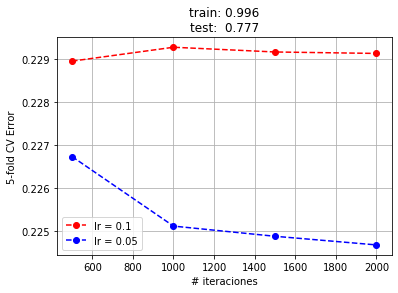

In [0]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=6,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [0]:
ytrainarbol = bt.predict(X_train)
ytestarbol = bt.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 train =', round (bt.score(X_train, y_train), 4))
print ('R^2 test =', round (bt.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.0391
RMSE Modelo  (test) : 0.281
R^2 train = 0.9957
R^2 test = 0.7773


Tenemos el mejor resultado aunque con una profundidad de 6. Puedo ir probando a modificar el parámetro max_depth
En el resultado también se aprecia overfitting por lo que se puede intentar reducir la complejidad vigilando que no empeoro demasiado el resultado en test

- RMSE Modelo  (train): 0.0391
- RMSE Modelo  (test) : 0.281
- R^2 train = 0.9957
- R^2 test = 0.7773

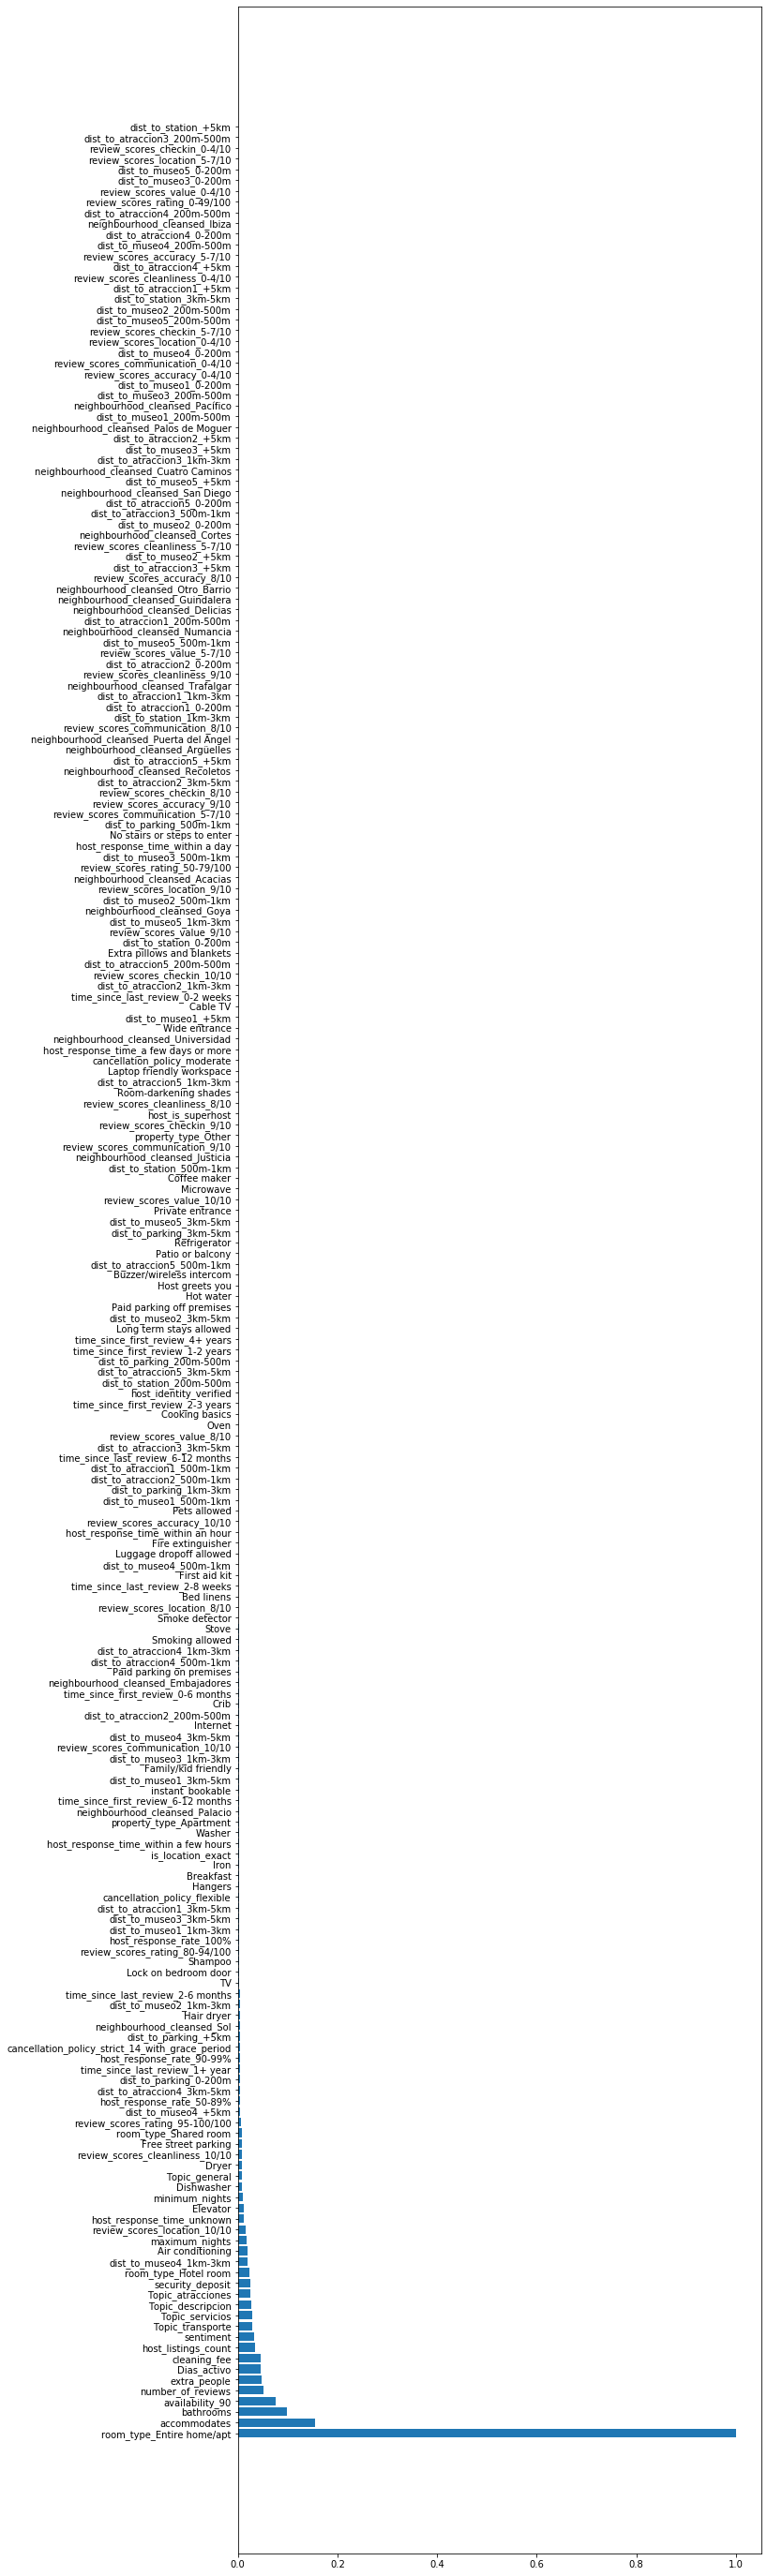

In [0]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,50))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Vemos que ahora hay más características con importancia 0. Se mantiene como más importante "Room Type_Entire home/apt" y en segunda posición "accomodates"

## 4.7 SVR

In [0]:
vectorC = np.logspace(-2, 2, 10)  #10 valores de un parámetro
vectorG = np.logspace(-5, 1, 8)   # 8 valores de un parametro
                                  #El dataset tienen además más de 16.000 registros

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
#X_train ya está escalado
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 130.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

best mean cross-validation score: 0.729
best parameters: {'C': 12.915496650148826, 'gamma': 0.0005179474679231213}


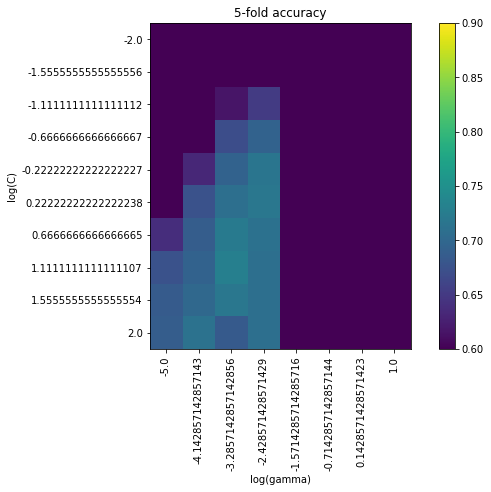

In [0]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [0]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X_train,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(X_test,y_test))

Acc (TEST): 0.74


In [0]:
ytrainSVR = svmModel.predict(X_train)
ytestSVR = svmModel.predict(X_test)

mseTrainModelSVR = mean_squared_error(y_train,ytrainSVR)
mseTestModelSVR = mean_squared_error(y_test,ytestSVR)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelSVR))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelSVR))

print ('R^2 train =', round (svmModel.score(X_train, y_train), 4))
print ('R^2 test =', round (svmModel.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.23
RMSE Modelo  (test) : 0.301
R^2 train = 0.85
R^2 test = 0.7429


Resultado:

RMSE Modelo  (train): 0.23

RMSE Modelo  (test) : 0.301

R^2 train = 0.85

R^2 test = 0.7429

No consigo mejorar las prestaciones del Boosted Tree

## 5.- Intentos de mejoras del modelo Boosted Tree

Me centro ahora en el modelo Boosted Tree. Cuando se hizo el estudio de correlación vi que las puntaciones de las review parecían estar correladas pero las dejé por si pudieran ser útiles. Sin embargo en el resultado de características importantes que nos da el modelo Boosted Tree se ve que su importancia es relativamente baja. Voy a probar a eliminar las que tienen una mayor correlación y veré si afecta positivamente al modelo.

Mirando de nuevo las correlaciones se aprecia que las review están relacionadas unas con otras y también con las columnas de "Review Score Ratings", así que lo que voy a hacer es quedarme con los "Review Score Ratings" genéricos y eliminar los particulares Accuaricy, Location, Commmunication.......

In [0]:
all_review = list(X_train.columns[X_train.columns.str.startswith("review_scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)

#Misma transformación para test
X_test_short = X_test.drop(review_to_drop, axis=1)

### Prueba 1: Menos características. Profundidad 6

In [0]:
Niterations = [500,1000,1500,2000] 
learningRate = [0.1,0.05] 
# mantenemos max_depth estático: max_depth=6

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=6), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.777
best parameters: {'learning_rate': 0.05, 'n_estimators': 1000}


In [0]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=6,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))
print ('R^2 train =', round (bt.score(X_train_short, y_train), 4))
print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.0874
RMSE Modelo  (test) : 0.278
R^2 train = 0.9784
R^2 test = 0.7819


Resultado:
- n_estimators: 1000
- learning_rate: 0.05
- max_depth= 6
- RMSE Modelo  (train): 0.0874
- R^2 train = 0.9784
- RMSE Modelo  (test) : 0.278
- R^2 test = 0.7819



Obtengo mejor resultado y además se ha eliminado mucha complejidad porque hemos quitado 30 características con lo que de momento esta sería la opción adecuada

In [0]:
len (review_to_drop)

30

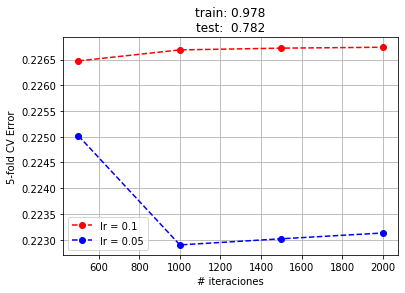

In [0]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [0]:
import pickle
#Guardo este modelo por si es el bueno defintivo
path_df = ruta + 'model/GradientBoostedTree.sav'
pickle.dump(bt, open(path_df, 'wb'))


### Prueba 2: Modificación de Niteracions y learning Rate. Mantengo profundidad 6
Pruebo a cambiar parámetros por si pudiera mejorar algo más

In [0]:
Niterations = [500,600,700,800,900,1000,1200] 
learningRate = [0.05, 0.01] 
# mantenemos max_depth estático: max_depth=6

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=6), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.777
best parameters: {'learning_rate': 0.05, 'n_estimators': 1200}


In [0]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=6,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

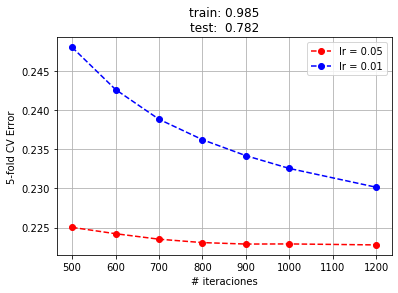

In [0]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [0]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))
print ('R^2 train =', round (bt.score(X_train_short, y_train), 4))
print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.0727
RMSE Modelo  (test) : 0.278
R^2 train = 0.9851
R^2 test = 0.7819


Resultado:
- n_estimators: 1200
- learning_rate: 0.05
- max_depth= 6
- RMSE Modelo  (train): 0.0727
- R^2 test = 0.9851
- RMSE Modelo  (test) : 0.278
- R^2 test = 0.7819


Tengo el mismo resultado que en la Prueba 1 pero he aumentado la complejidad con n_estimators: 1200. Me quedo de momento con la Prueba 1

### Prueba 3: Modificación profundidad 4
Pruebo a disminuir profundidad

In [0]:
Niterations = [500,800,1000,1500,2000] 
learningRate = [0.05, 0.01] 
# mantenemos max_depth estático: max_depth=4

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=4), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.774
best parameters: {'learning_rate': 0.05, 'n_estimators': 1500}


In [0]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

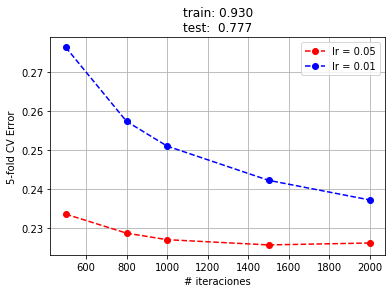

In [0]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [0]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))
print ('R^2 train =', round (bt.score(X_train_short, y_train), 4))
print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.158
RMSE Modelo  (test) : 0.281
R^2 train = 0.9298
R^2 test = 0.7766


Resultado:
- n_estimators: 1500
- learning_rate: 0.05
- max_depth= 4
- RMSE Modelo  (train): 0.158
- R^2 train = 0.9298
- RMSE Modelo  (test) : 0.281
- R^2 test = 0.7766

Ha aumentado un poco el error al disminuir la profundidad pero no hay demasiada diferencia y le he quitado complejidad al modelo por lo que me quedo de momento con esa Prueba 3

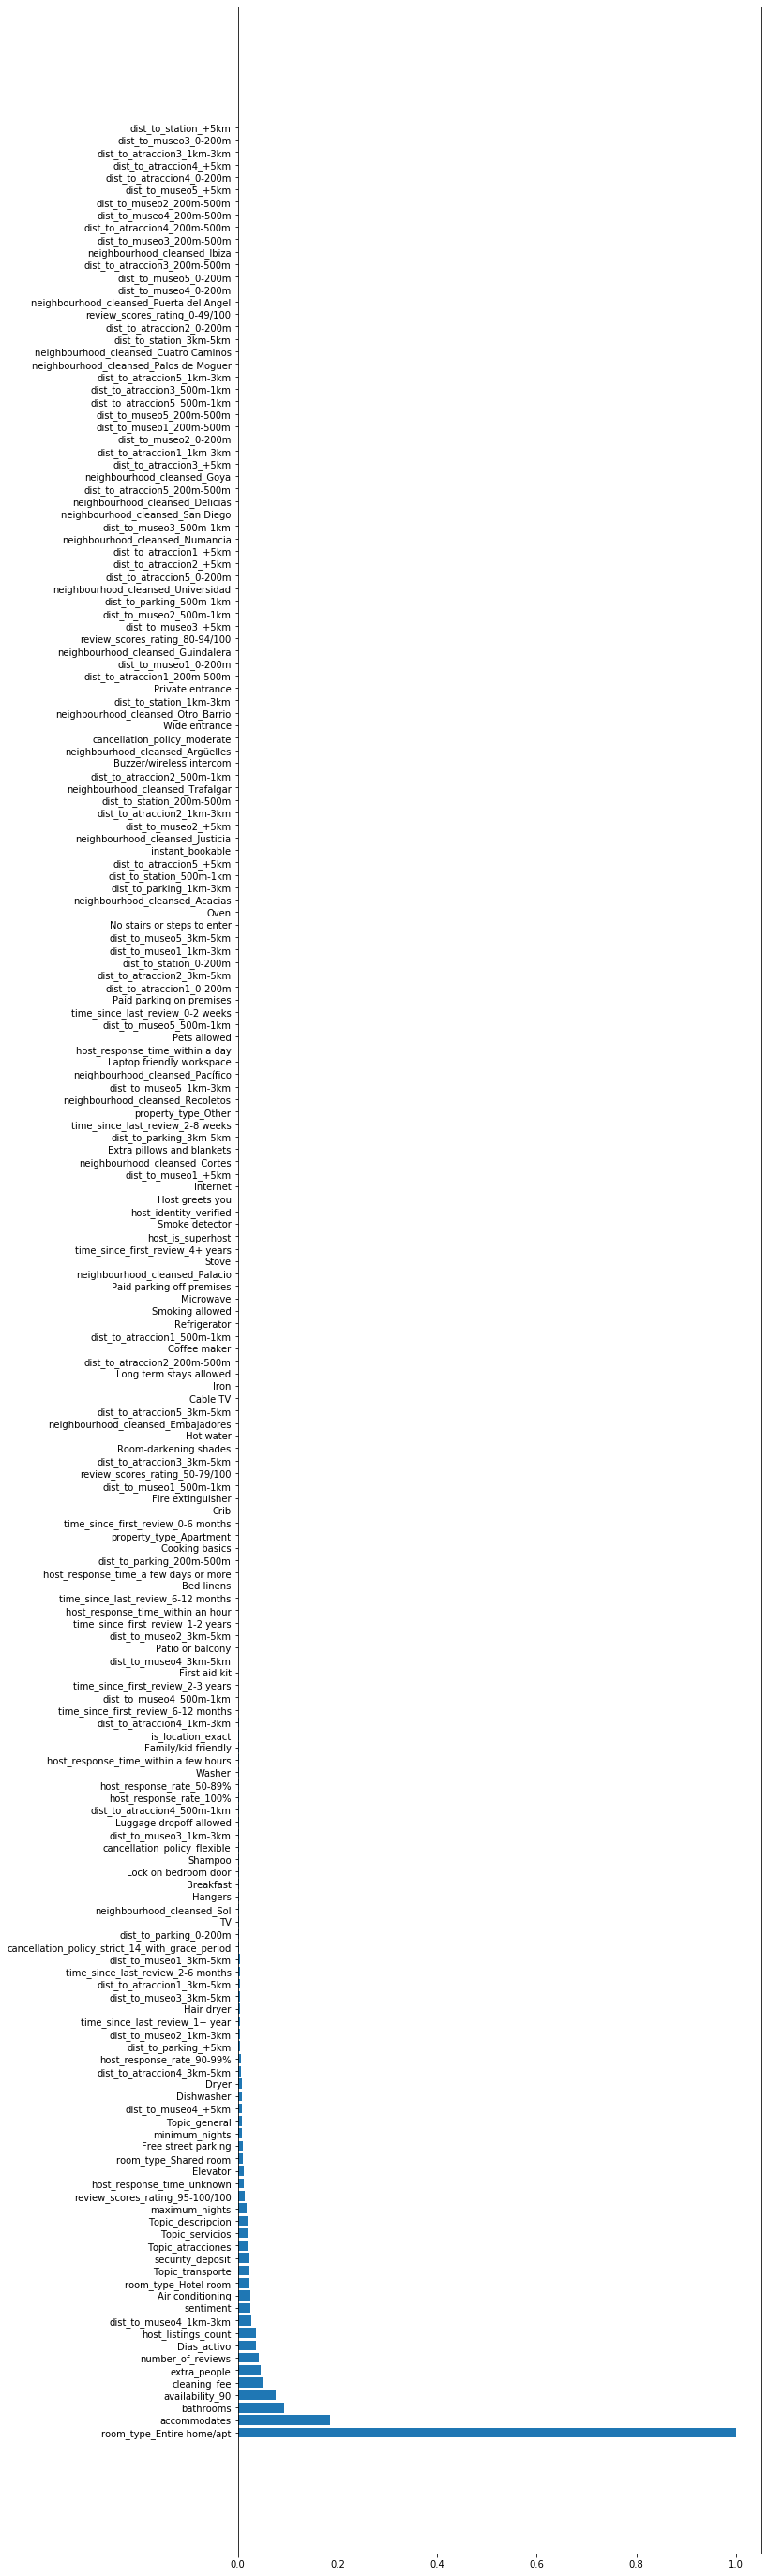

In [0]:
#Importancia de las características
feature_names = X_train_short.columns[0:]
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,50))
plt.barh(range(X_train_short.shape[1]),importances[indices])
plt.yticks(range(X_train_short.shape[1]),feature_names[indices])
plt.show()

### Prueba 4:  Profundidad 4 y aumento iteraciones y lr

In [0]:
Niterations = [1000,1500,1600,1800,2000] 
learningRate = [0.1,0.05] 
# mantenemos max_depth estático: max_depth=4

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=4), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.774
best parameters: {'learning_rate': 0.05, 'n_estimators': 1500}


In [0]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

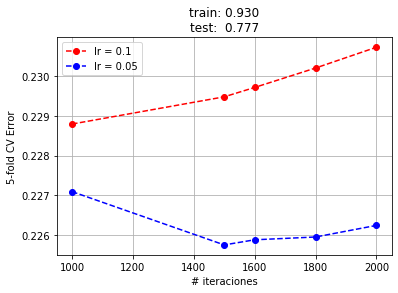

In [0]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [0]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))
print ('R^2 train =', round (bt.score(X_train_short, y_train), 4))
print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.158
RMSE Modelo  (test) : 0.281
R^2 train = 0.9298
R^2 test = 0.7766


Resultado:
- n_estimators: 1500
- learning_rate: 0.05
- max_depth= 4
- RMSE Modelo  (train): 0.158
- R^2 test = 0.9298
- RMSE Modelo  (test) : 0.281
- R^2 test = 0.7766

Obtengo el mismo resultado que con la prueba 3

### Prueba 5: Modificación profundidad a 3
Pruebo a disminuir profundidad

In [36]:
Niterations = [1000,1500,1600,1800,2000] 
learningRate = [0.1,0.05] 
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.768
best parameters: {'learning_rate': 0.05, 'n_estimators': 2000}


In [37]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= lRateOptimo, n_estimators= nEstimatorsOptimo)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

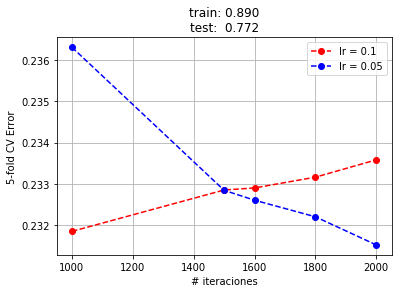

In [38]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_short,y_train),bt.score(X_test_short,y_test)))
plt.grid()
plt.show()

In [39]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))
print ('R^2 train =', round (bt.score(X_train_short, y_train), 4))
print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.197
RMSE Modelo  (test) : 0.284
R^2 train = 0.89
R^2 test = 0.7715


Resultado:
- n_estimators: 2000
- learning_rate: 0.05
- max_depth= 3
- RMSE Modelo  (train): 0.197
- R^2 train = 0.89
- RMSE Modelo  (test) : 0.284
- R^2 test = 0.7715

### Prueba 6: Fijamos profundidad 3 e iteraciones 500
Pruebo a disminuir iteraciones

In [31]:
#Niterations = [1000,1500,1600,1800,2000] 
learningRate = [0.1,0.05] 
# mantenemos max_depth estático: max_depth=3

param_grid = {'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3, n_estimators=500), param_grid=param_grid, cv = 5)
grid.fit(X_train_short, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.764
best parameters: {'learning_rate': 0.1}


In [32]:
lRateOptimo = grid.best_params_['learning_rate']
#nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= lRateOptimo, n_estimators= 500)
bt.fit(X_train_short,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
ytrainarbol = bt.predict(X_train_short)
ytestarbol = bt.predict(X_test_short)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))
print ('R^2 train =', round (bt.score(X_train_short, y_train), 4))
print ('R^2 test =', round (bt.score(X_test_short, y_test), 4))

RMSE Modelo  (train): 0.231
RMSE Modelo  (test) : 0.285
R^2 train = 0.8496
R^2 test = 0.7703


Resultado:
- n_estimators: 500
- learning_rate: 0.1
- max_depth= 3
- RMSE Modelo  (train): 0.231
- R^2 train = 0.8496
- RMSE Modelo  (test) : 0.285
- R^2 test = 0.7703

Guardo este modelo que considero que va a ser el óptimo

In [0]:
import pickle
#Guardo este modelo 
path_df = ruta + 'model/GradientBoostedTree.sav'
pickle.dump(bt, open(path_df, 'wb'))

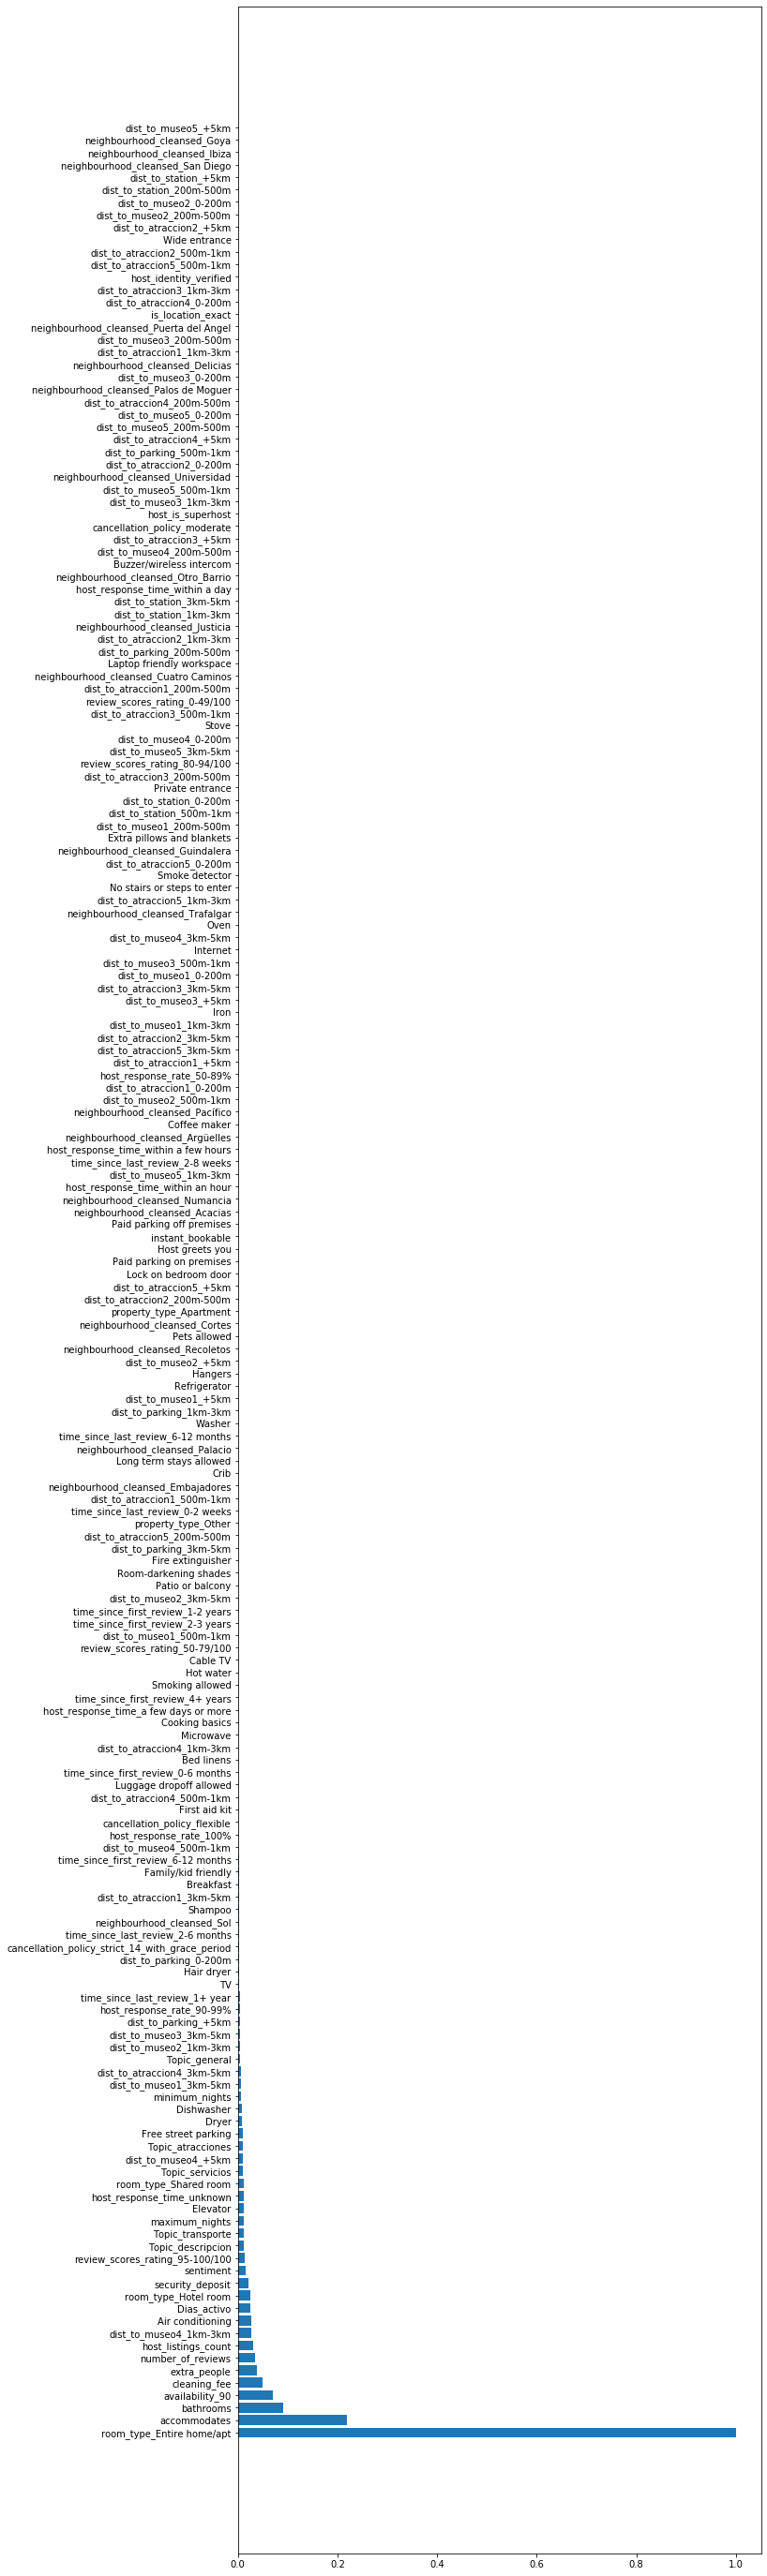

In [35]:
#Importancia de las características
feature_names = X_train_short.columns[0:]
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,50))
plt.barh(range(X_train_short.shape[1]),importances[indices])
plt.yticks(range(X_train_short.shape[1]),feature_names[indices])
plt.show()

## 10.- Conclusión

El modelo con el que me quedo es el "Gradient Boosted Tree" con los siguientes parámetros:
- n_estimators: 500
- learning_rate: 0.1
- max_depth: 3

Con esto consigo para mi conjunto de test y, tras aplicar todas las transformaciones necesarias, estos resultados:

- R^2 = 0.7703
- RMSE = 0.285

Las tres característica más importantes para el cálculo del precio en orden son:

- Room Type: Entire home/apt
- Accomodates
- Bathrooms